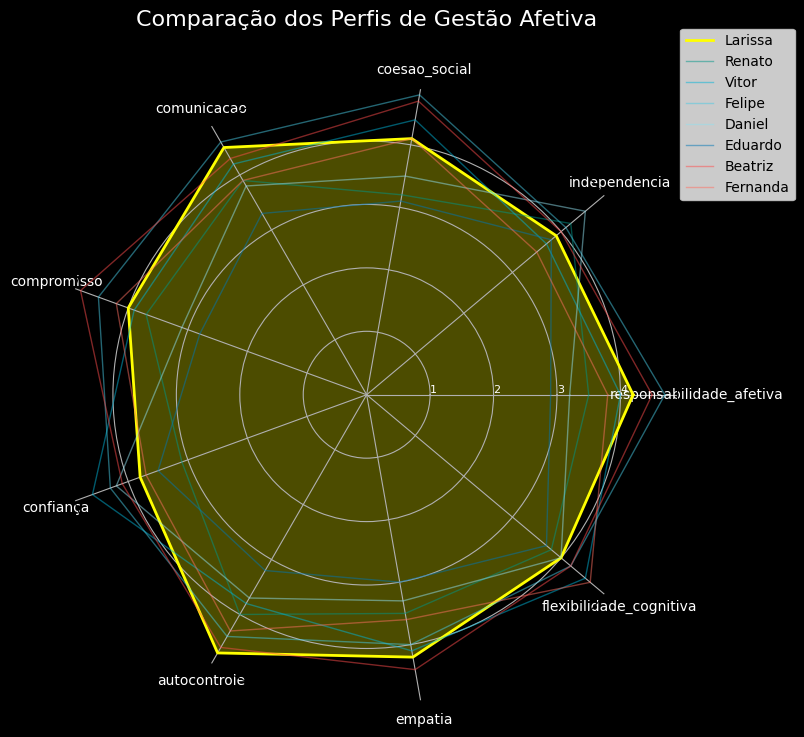

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import io

def grafico_teia(df, participante_destaque):
    variaveis = ['responsabilidade_afetiva', 'independencia', 'coesao_social', 'comunicacao', 'compromisso', 'confiança', 'autocontrole', 'empatia', 'flexibilidade_cognitiva']
    num_variaveis = len(variaveis)
    valores = df[variaveis].values.tolist()
    angulos = [n / float(num_variaveis) * 2 * pi for n in range(num_variaveis)]
    angulos += angulos[:1]

    plt.figure(figsize=(8, 8), facecolor='black')
    ax = plt.subplot(111, polar=True)
    ax.set_facecolor('black')

    cores_azul_verde = ['#0077B6', '#009688', '#00B4D8', '#48CAE4', '#90E0EF']
    cores_vermelho = ['#FF4C4C', '#FF6F61', '#FF8C69']

    for i, participante in enumerate(df['participante']):
        valores_participante = valores[i]
        valores_participante += valores_participante[:1]

        if participante == participante_destaque:
            ax.plot(angulos, valores_participante, linewidth=2, linestyle='solid', label=participante, color='yellow')
            ax.fill(angulos, valores_participante, color='yellow', alpha=0.3)
        elif participante in ['Larissa', 'Beatriz', 'Fernanda', 'Clara', 'Paula', 'Gabriela']:
            cor_vermelho = cores_vermelho[i % len(cores_vermelho)]
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_vermelho, alpha=0.5)
        else:
            cor_homem = cores_azul_verde[i % len(cores_azul_verde)]
            ax.plot(angulos, valores_participante, linewidth=1, linestyle='solid', label=participante, color=cor_homem, alpha=0.5)

    plt.xticks(angulos[:-1], variaveis, color='white', size=10)
    ax.tick_params(colors='white')
    ax.yaxis.set_tick_params(labelsize=8)
    ax.set_rlabel_position(0)

    plt.title('Comparação dos Perfis de Gestão Afetiva', size=16, color='white', y=1.08)
    plt.tight_layout()
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
    plt.show()


# Dataset 1 - Larissa em destaque
data_csv_1 = """participante,tipo_relacionamento,responsabilidade_afetiva,independencia,coesao_social,comunicacao,compromisso,confiança,autocontrole,empatia,flexibilidade_cognitiva
Larissa,Poliamor Não-Hierárquico com Alta Interdependência,4.2,3.9,4.1,4.5,4,3.8,4.7,4.2,4
Renato,Relação Aberta com Foco no Casual,3.5,4.2,3.2,3.9,3.7,3.1,4,3.5,3.8
Vitor,Swing com Conexões Emocionais,4,3.7,4.4,4.2,3.9,4.6,3.8,4.1,4.5
Felipe,Relação Fechada com Alta Cumplicidade,4.7,4.1,4.8,4.6,4.5,4.3,4.4,4,4.2
Daniel,Poliamor Não-Hierárquico com Baixa Interdependência,3.2,4.5,3.5,3.8,3.1,4.2,3.7,3.3,4
Eduardo,Swing com Foco em Trocas Sexuais,2.9,3.8,3.1,3.3,2.8,3.5,3.2,3,3.7
Beatriz,Poliamor Não-Hierárquico com Conexões Emocionais,4.5,4,4.7,4.3,4.8,4.1,4.6,4.4,4.2
Fernanda,Swing com Alta Interdependência,3.8,3.5,4.1,3.9,4.2,3.7,4.3,3.6,4.6
"""

df_1 = pd.read_csv(io.StringIO(data_csv_1))
grafico_teia(df_1, 'Larissa')